In [4]:
import warnings

warnings.filterwarnings("ignore")

import sys
sys.path.append("../")

import os
import re
import six
import random
import joblib
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.ticker import PercentFormatter, FuncFormatter
import seaborn as sns
from scorecardpipeline import *


init_setting()

### 三方数据评估报告输出

100%|██████████| 20/20 [00:27<00:00,  1.35s/it, feature=foreign_worker]                                          


(637, 22)

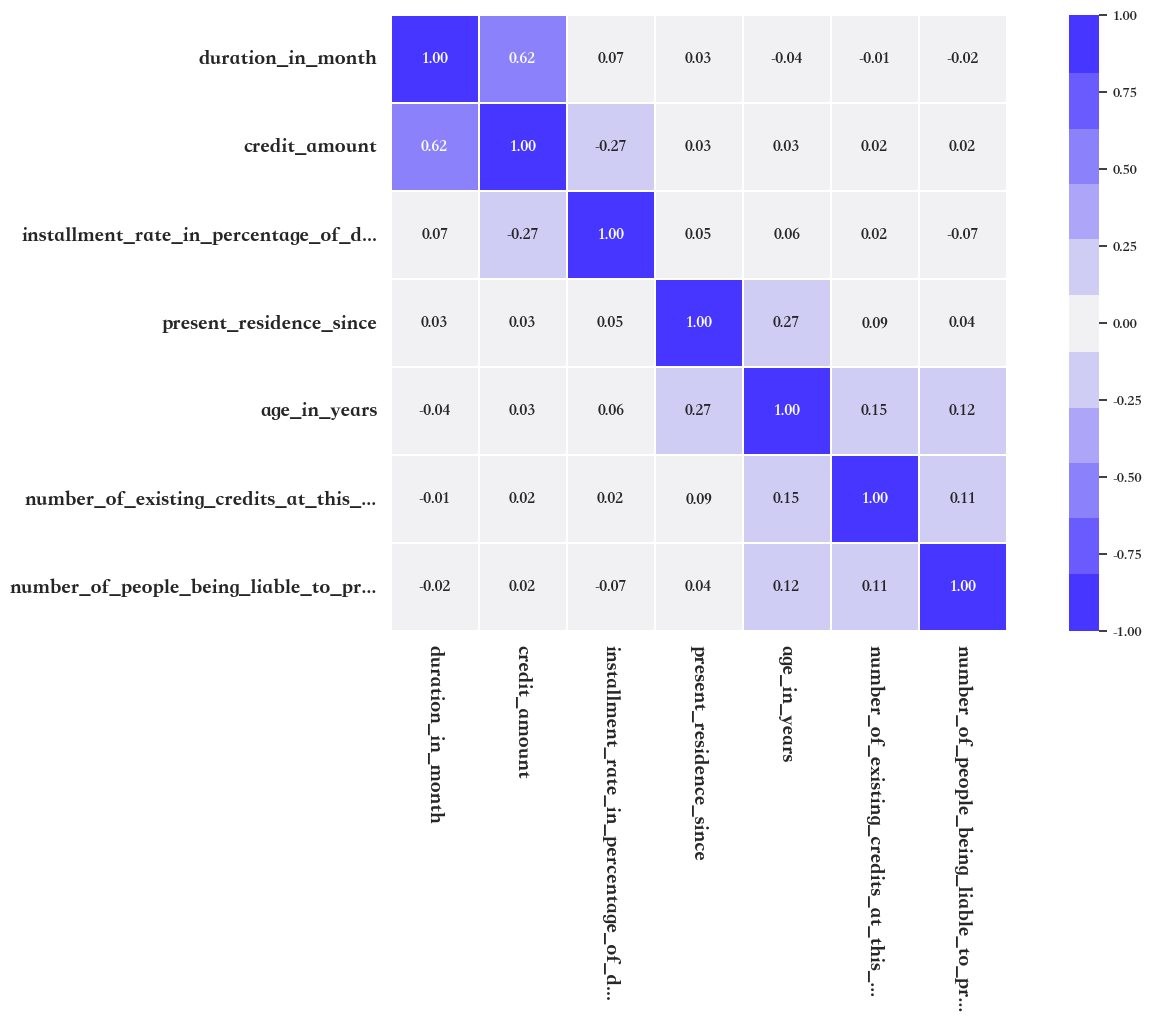

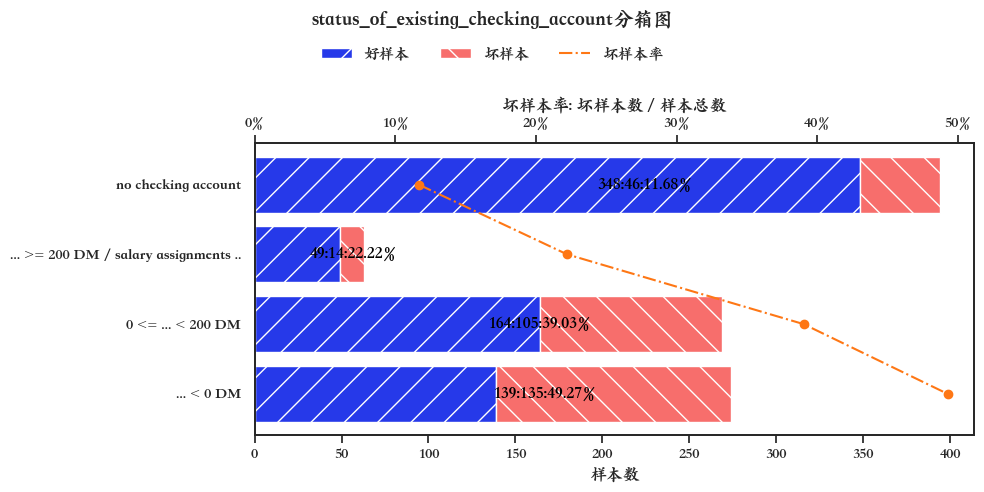

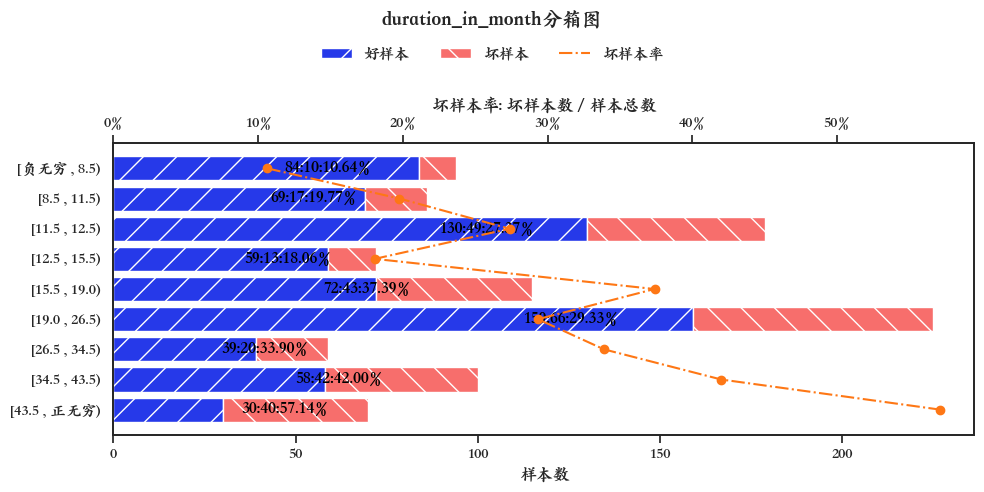

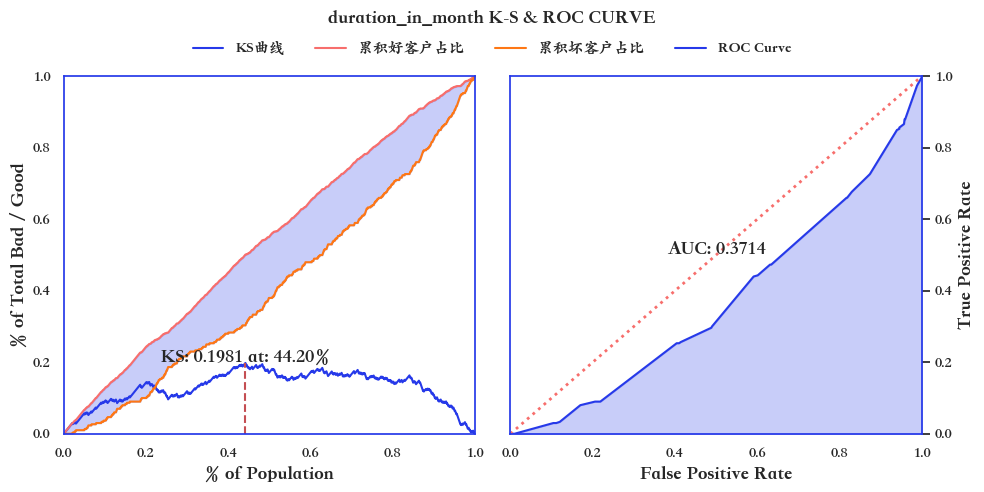

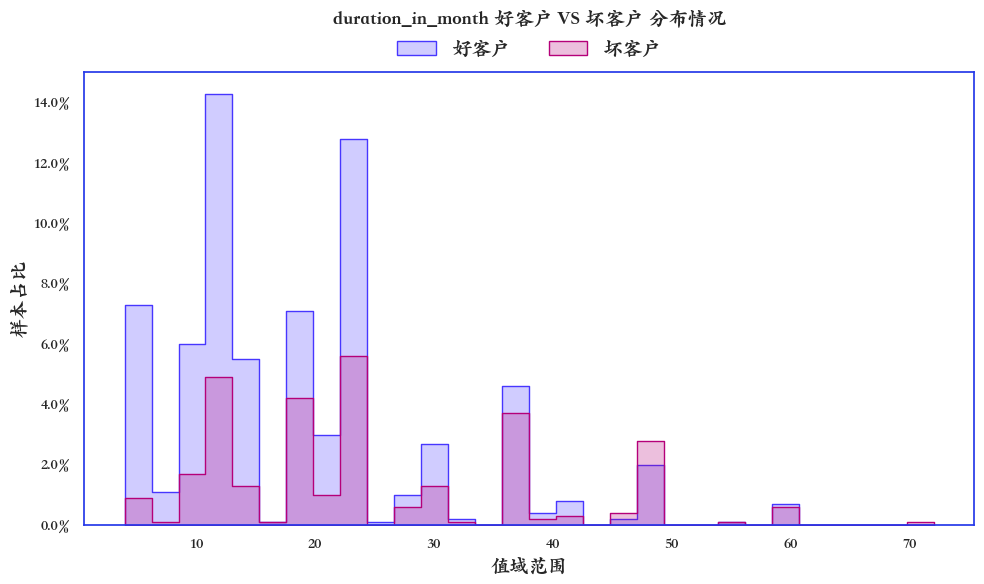

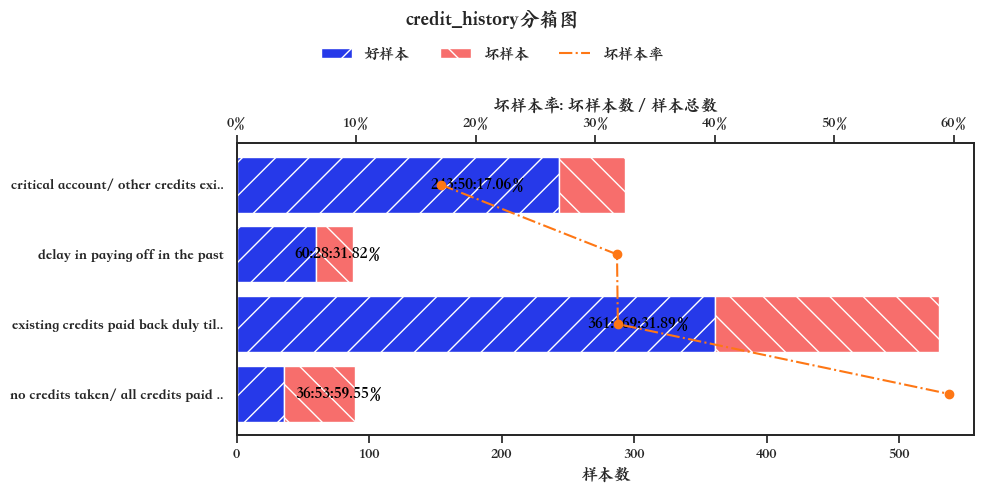

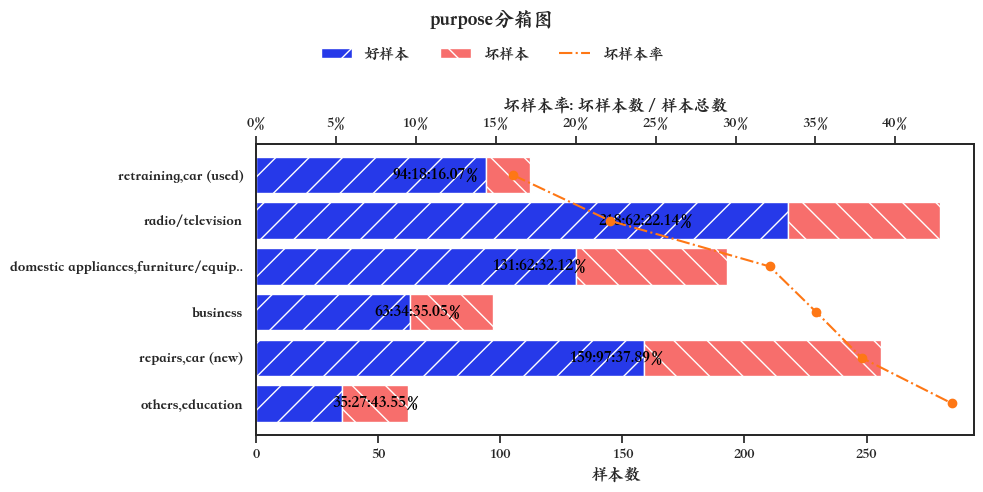

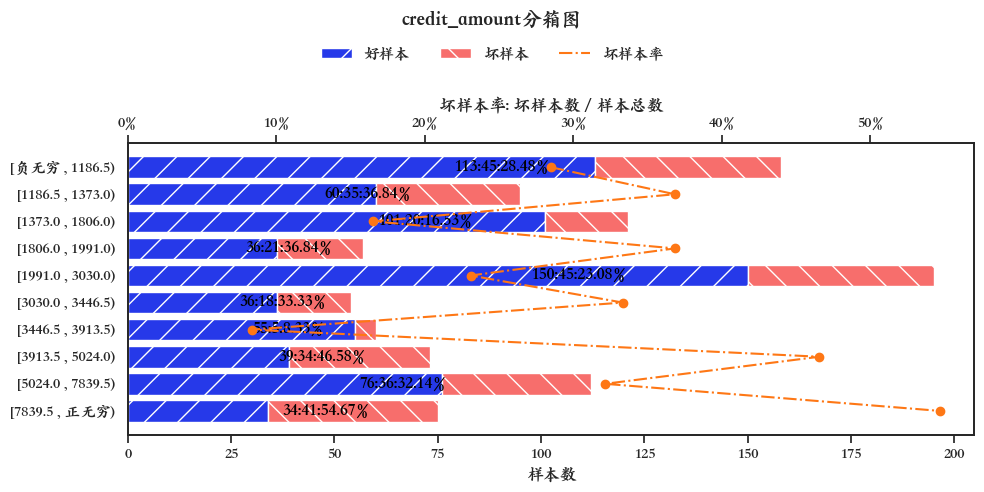

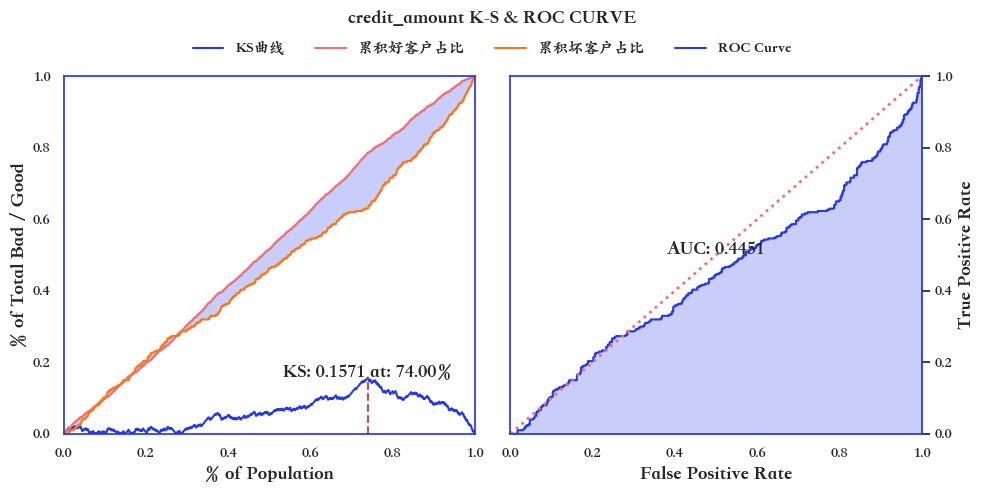

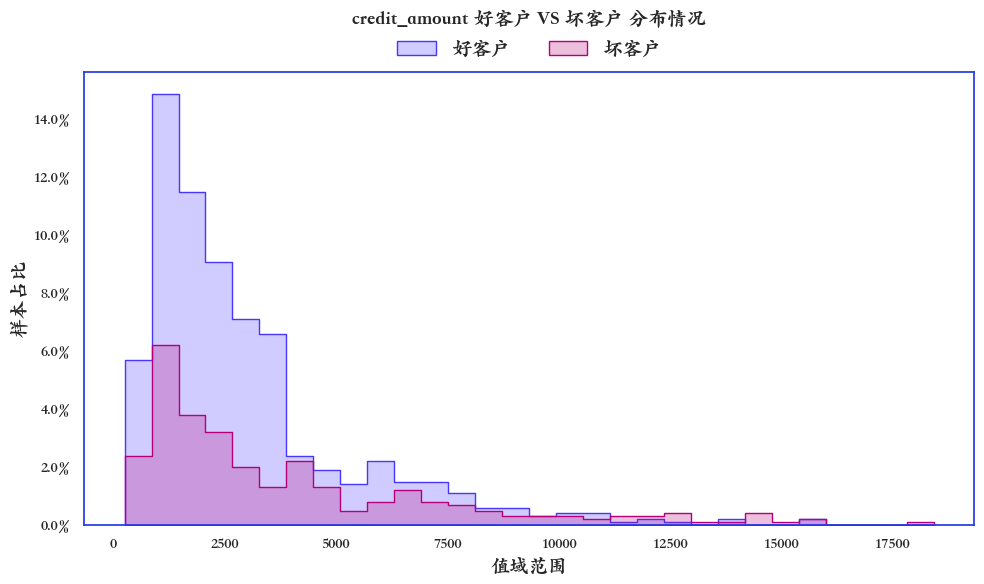

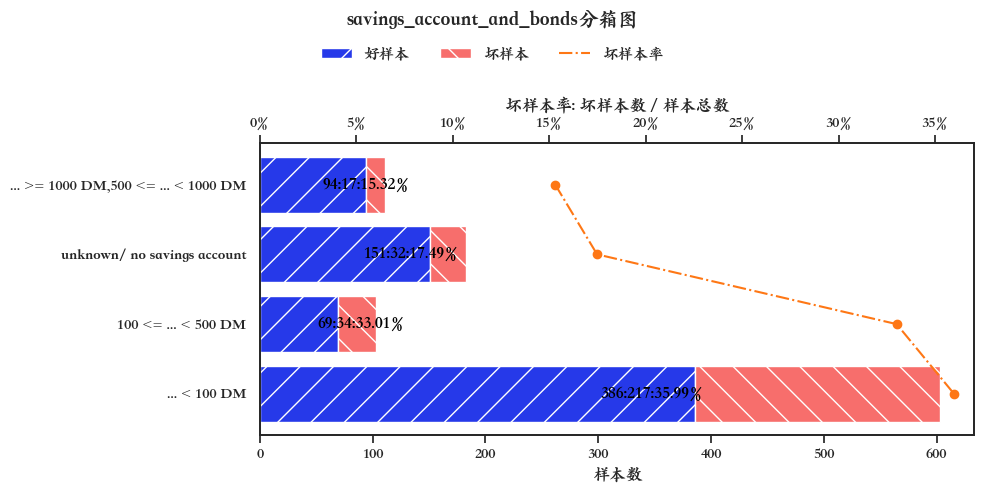

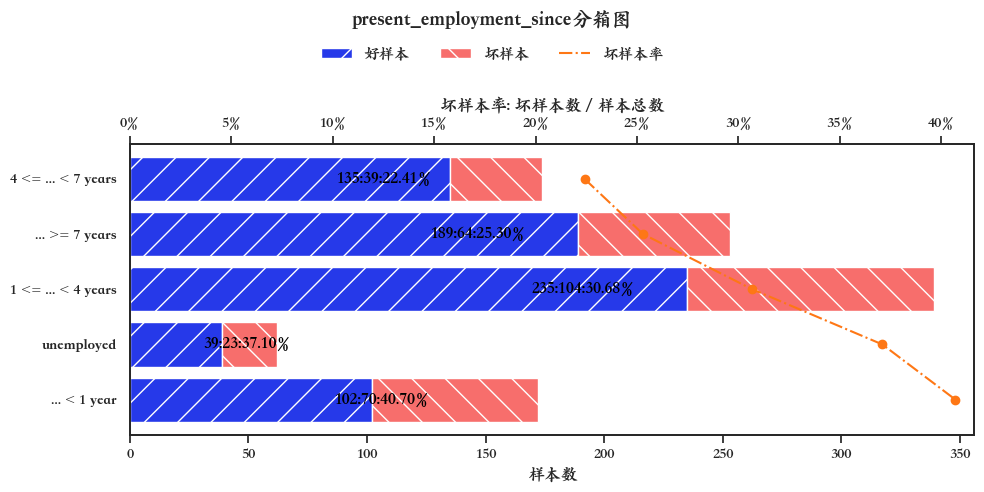

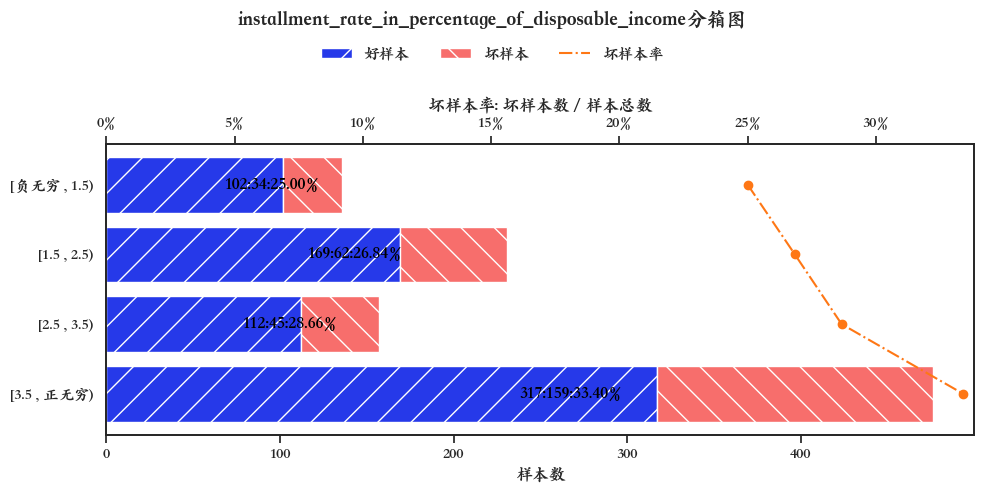

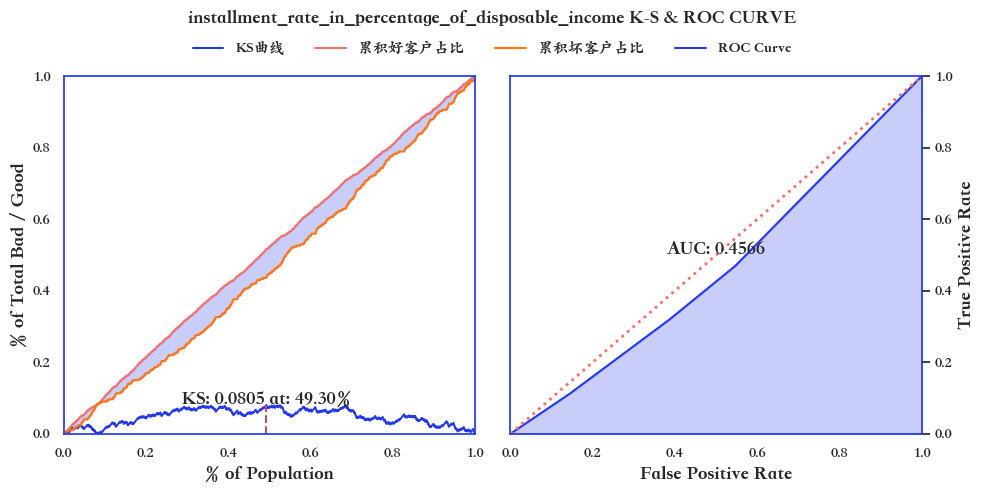

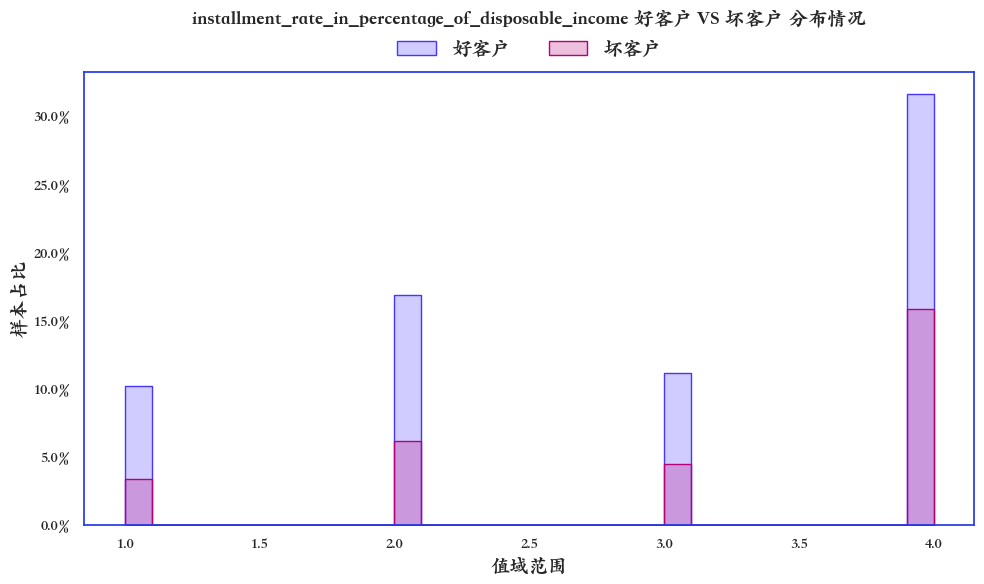

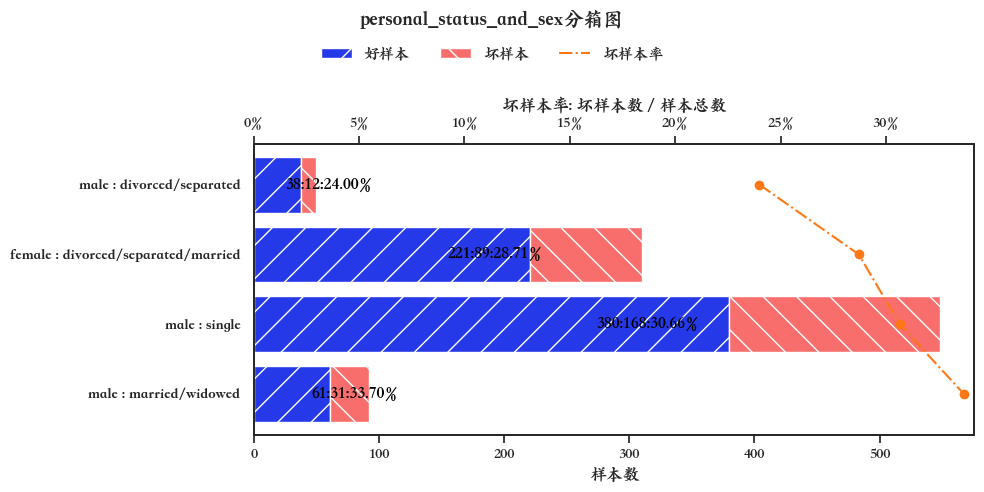

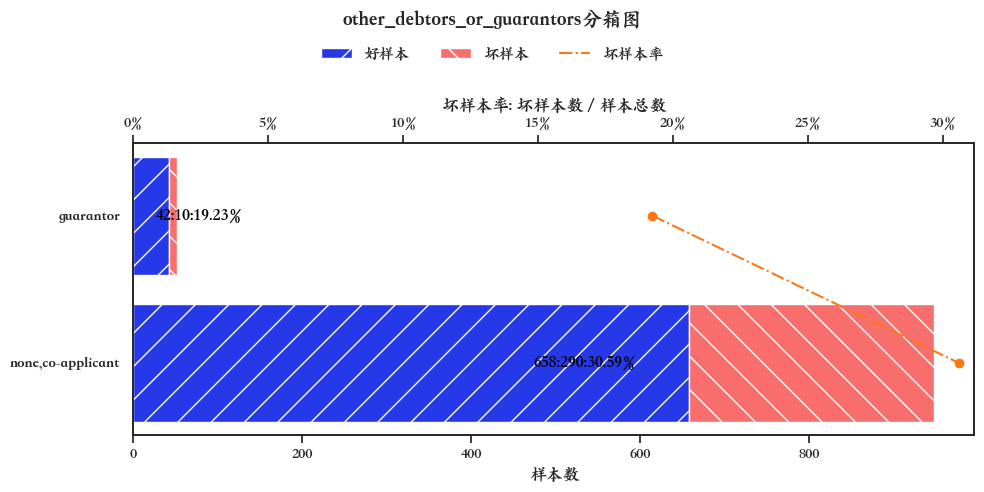

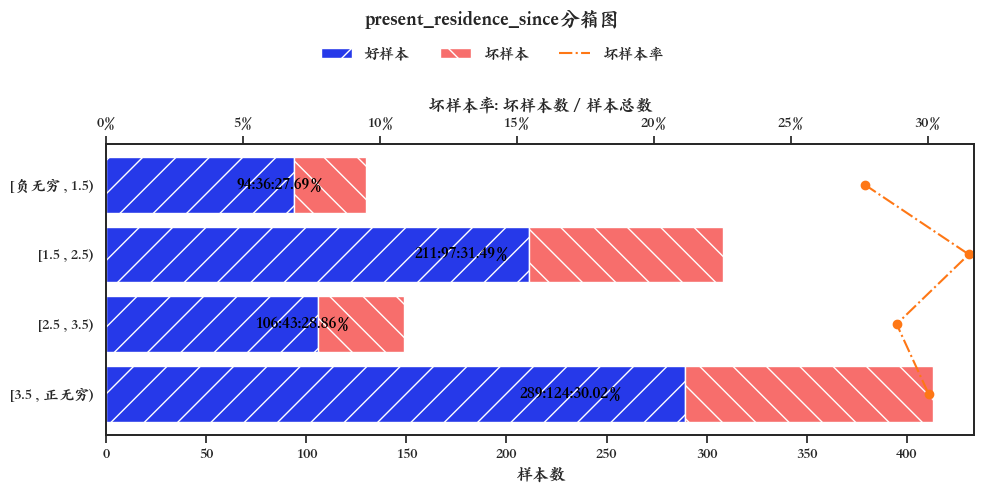

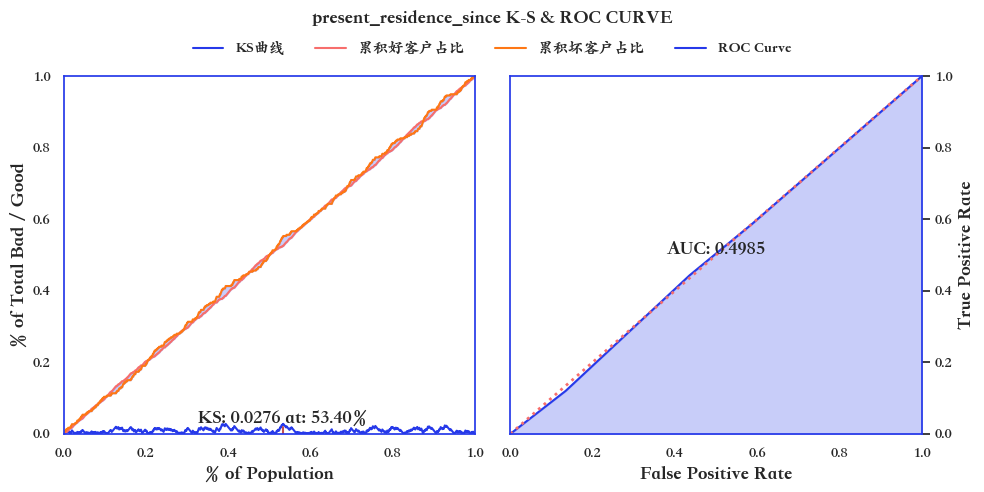

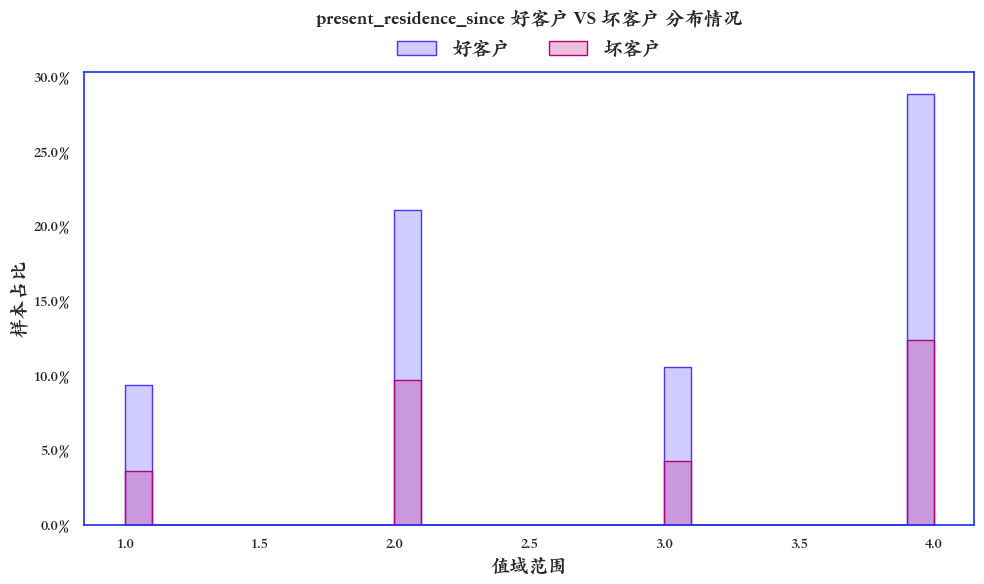

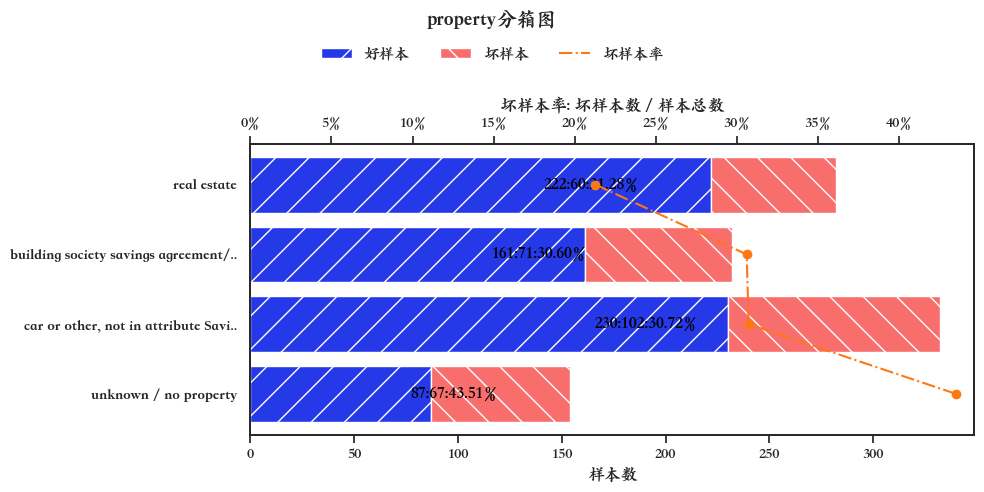

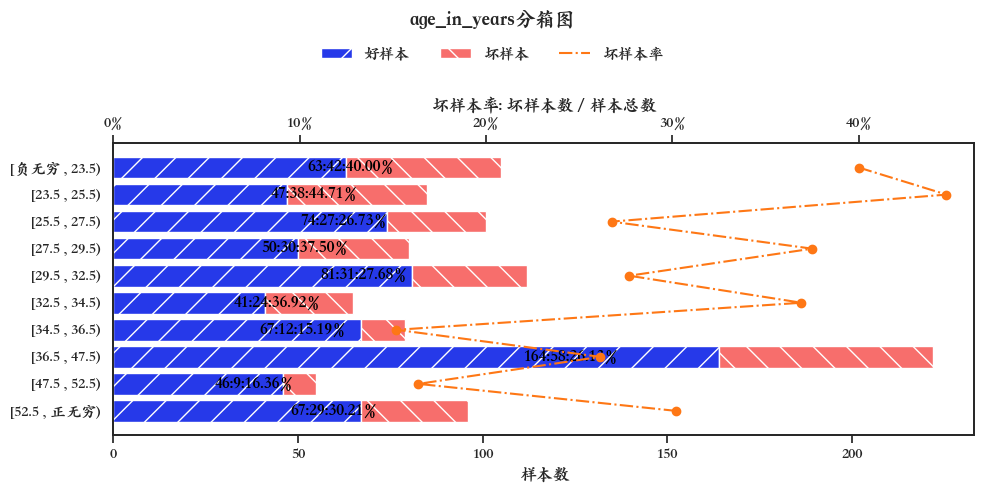

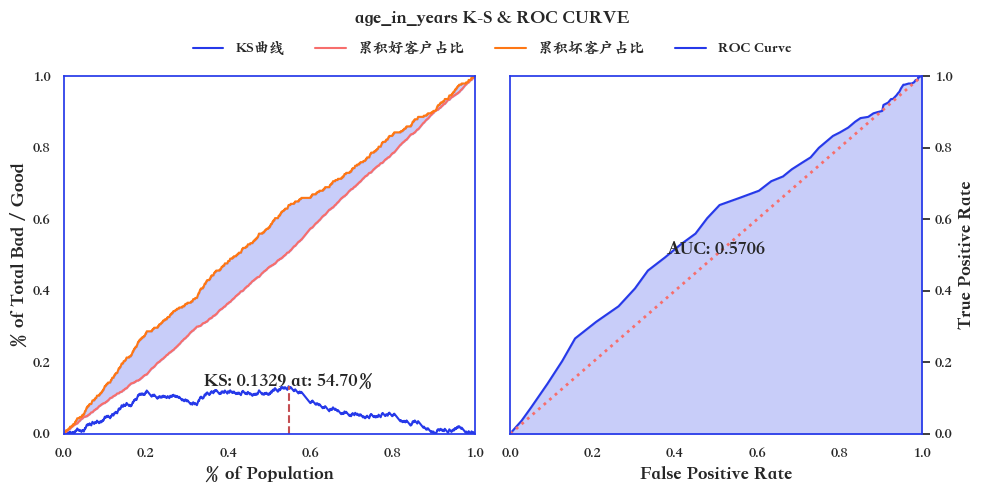

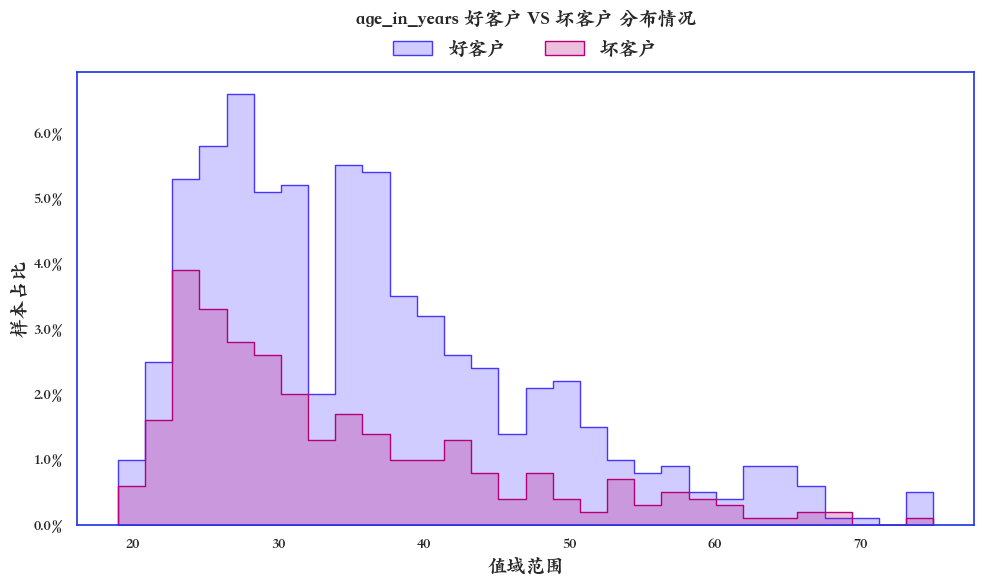

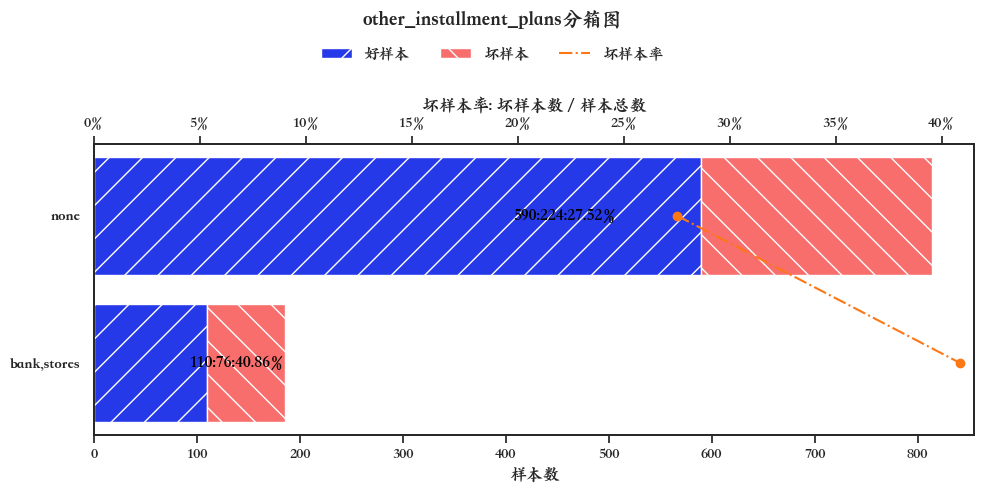

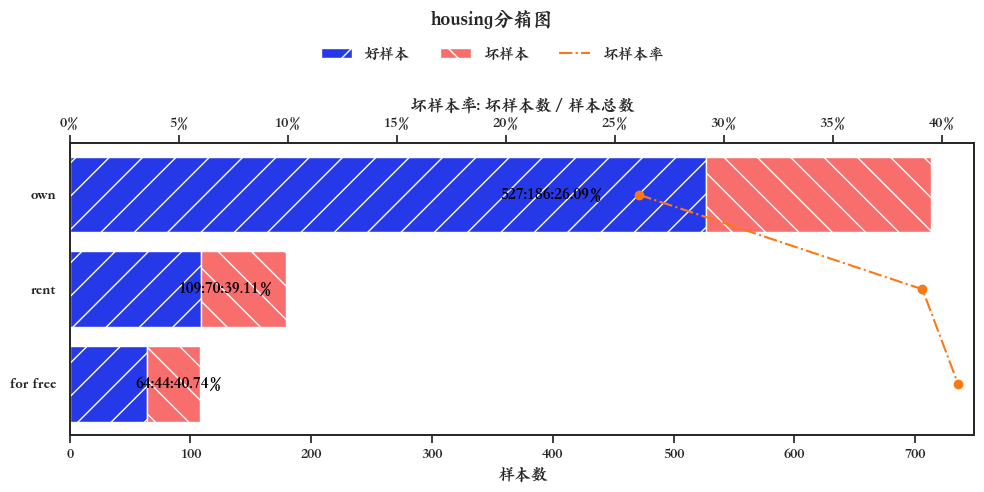

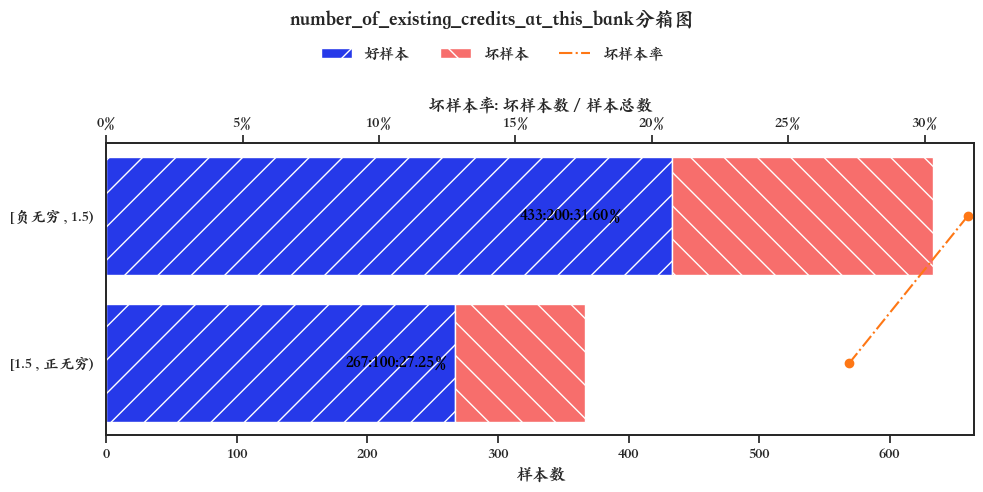

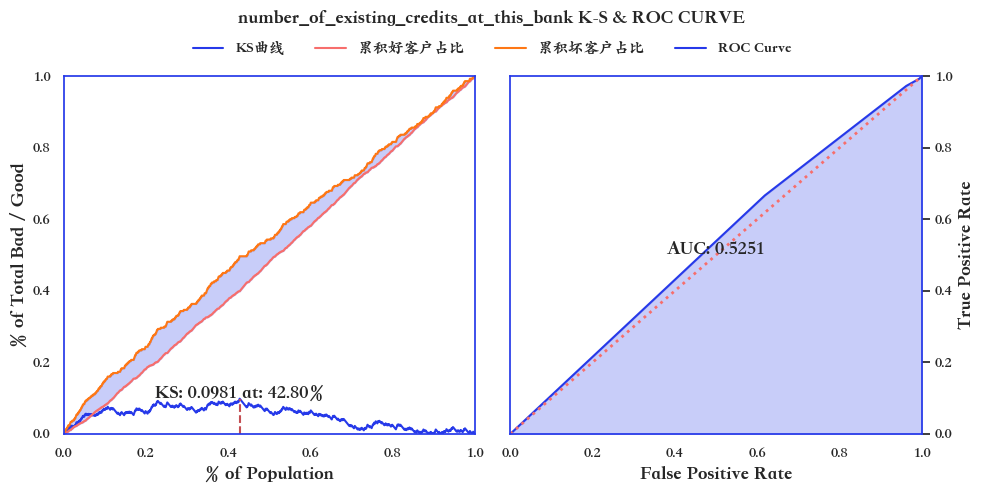

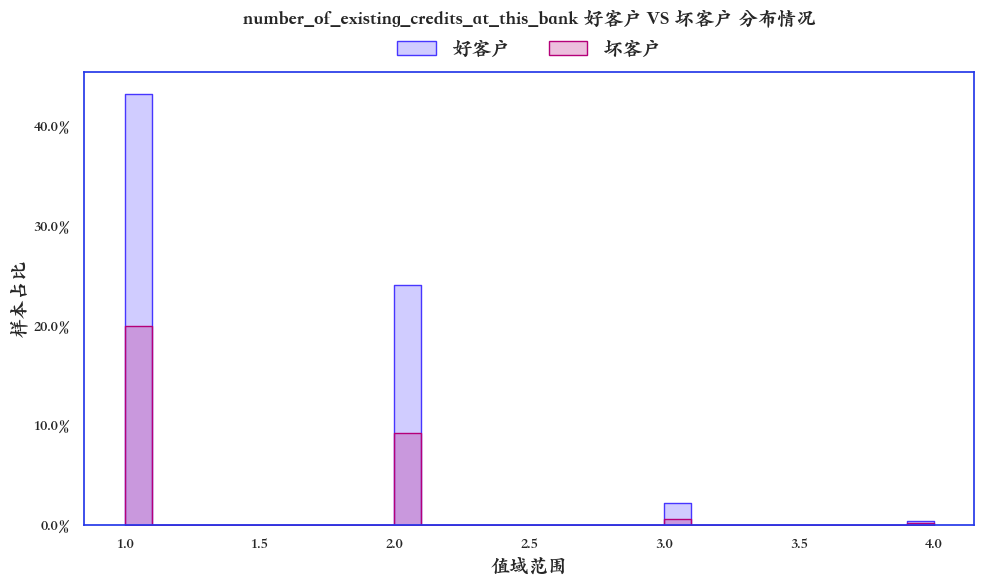

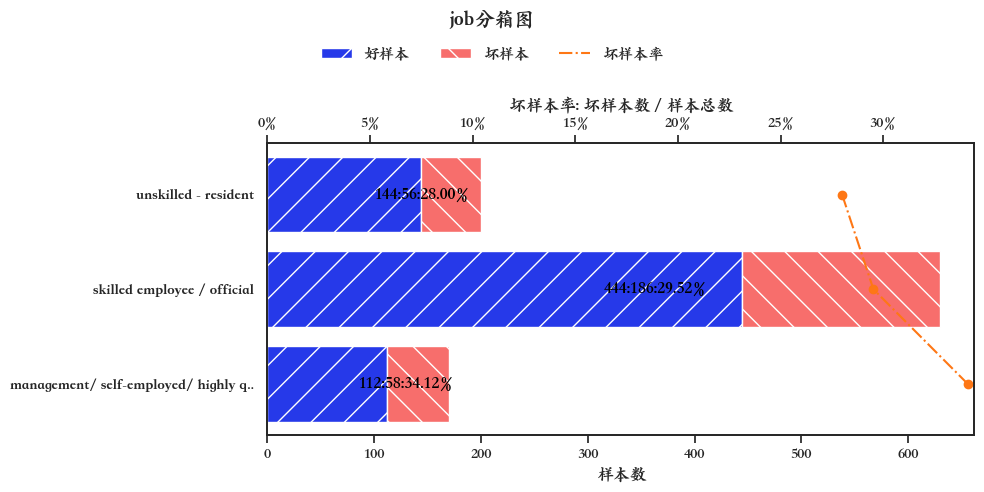

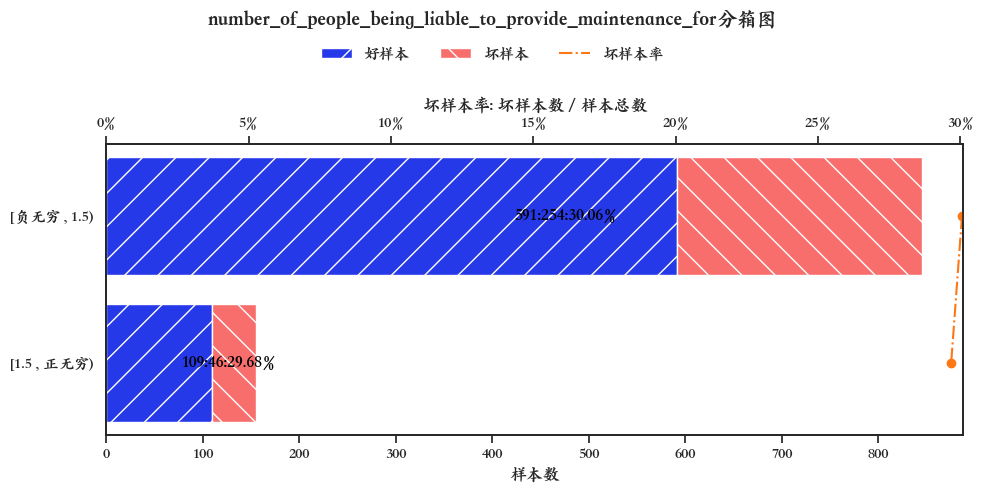

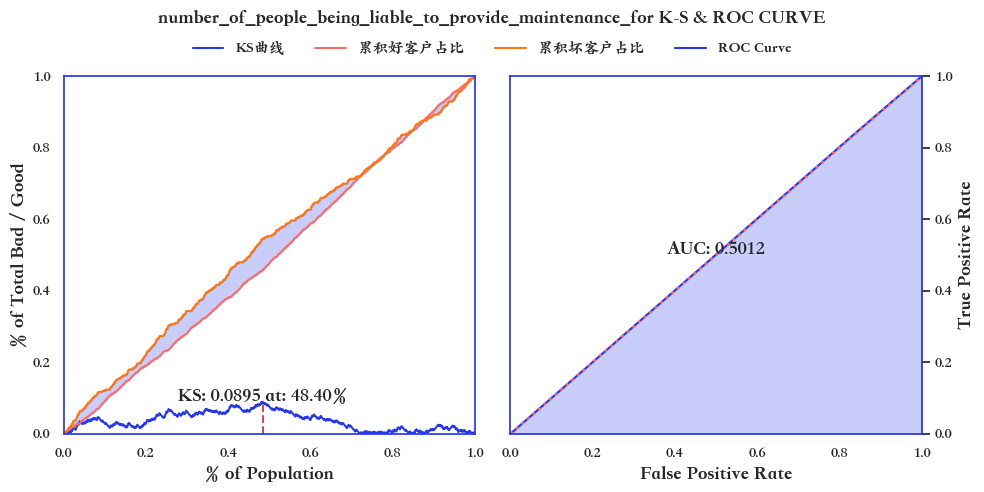

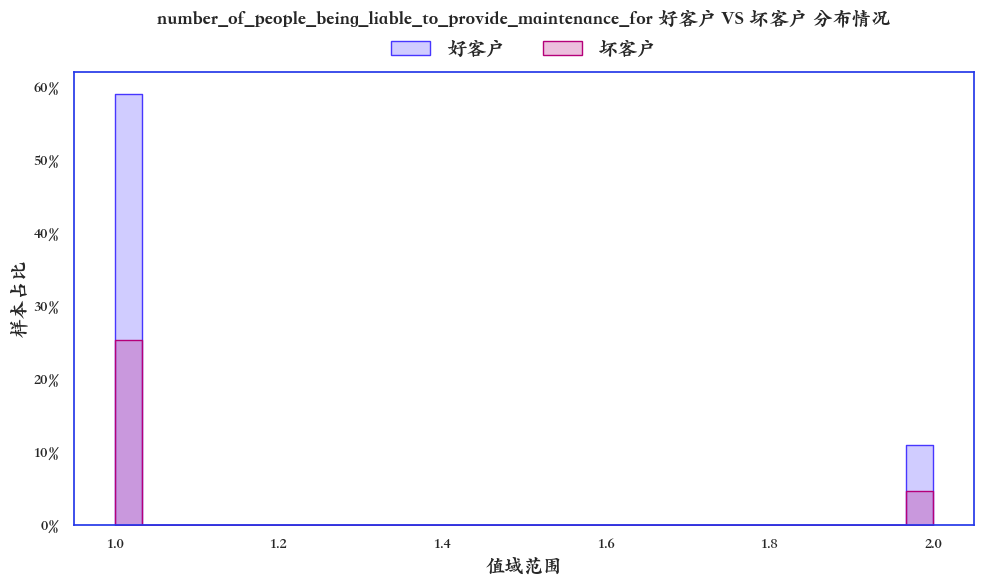

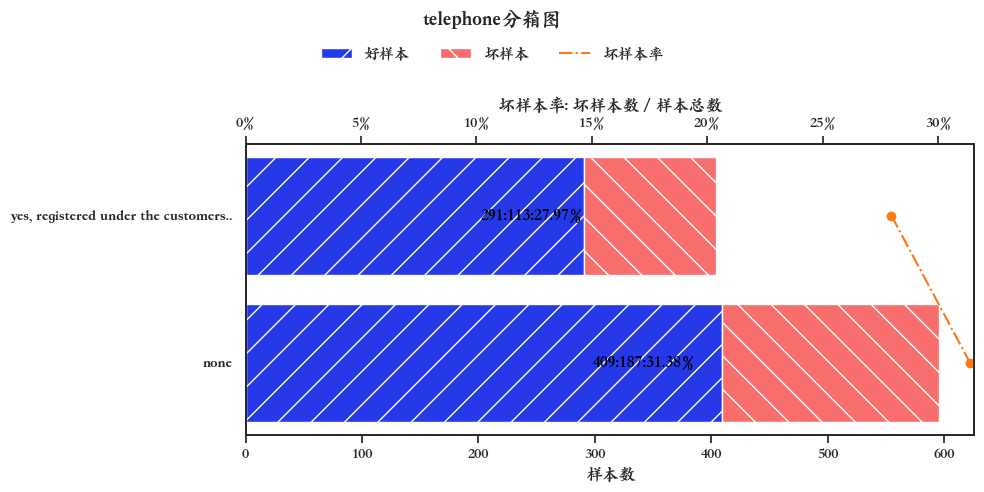

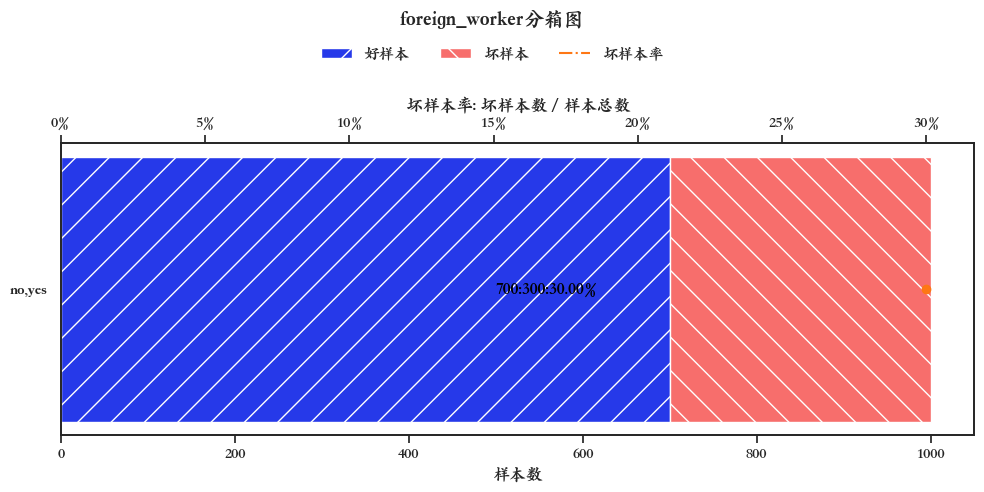

In [2]:
# 参考: https://scorecardpipeline.itlubber.art/scorecardpipeline.html#module-scorecardpipeline.auto_report
# pip install scorecardpipeline -i https://pypi.org/simple

from scorecardpipeline import *

# 初始化设置，包含忽略warning、画图字体、[随机种子、日志输出]
init_setting()

# 加载数据集，标签转换为 0 和 1
target = "creditability"
data = germancredit()
data[target] = data[target].map({"good": 0, "bad": 1})
features = data.columns.drop(target).tolist()

# 测试报告输出
auto_data_testing_report(data
                         , features=features
                         , target=target
                         , date=None # 传入日期列名，会按 freq 统计不同时间维度好坏样本的分布情况
                         , freq="M"
                         , data_summary_comment=""
                         , excel_writer="model_report/三方数据测试报告.xlsx"
                         , sheet="分析报告"
                         , start_col=2
                         , start_row=2
                         , writer_params={}
                         , bin_params={"method": "dt", "min_bin_size": 0.05, "max_n_bins": 10} # feature_bin_stats 函数的相关参数
                         , pictures=['bin', 'ks', 'hist'] # 类别型变量不支持 ks 和 hist
                         , corr=True
                         )

### 自动EDA输出报告

In [3]:
# 加载数据集
data = germancredit()

# 设置目标变量名称 & 映射目标变量值域为 {0, 1}
target = "creditability"
data[target] = data[target].map({"good": 0, "bad": 1})

# 随机替换 20% 的数据为 np.nan
for col in data.columns.drop(target):
    for i in range(len(data)):
        if np.random.rand() > 0.8:
            data[col].loc[i] = np.nan

# 自动 eda 并保存文件
auto_eda_sweetviz(data, target=target)

                                             |          | [  0%]   00:00 -> (? left)

Report model_report/auto_eda.html was generated.
